<a href="https://colab.research.google.com/github/LucasMirandaD/Gestion-de-Datos/blob/main/LM_Competencia_Ausentismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ayuda -> Caso_Ausentismo_de_Turnos_2023

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
datos= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/ausentismo_2023/datos_train.csv',delimiter=',',decimal='.')

# Preprocesamiento

## Descripccion de datos

In [3]:
datos.head(2)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
0,1,30846,29333,F,2019-08-12 18:38:08+00:00,2019-08-12 00:00:00+00:00,40,62,0,1,0,0,0,0,0
1,2,55326,29080,M,2019-08-12 16:08:27+00:00,2019-08-12 00:00:00+00:00,40,56,0,0,0,0,0,0,0


In [4]:
datos.shape

(86000, 15)

In [5]:
datos.ausente.value_counts()

0    68230
1    17770
Name: ausente, dtype: int64

<Axes: >

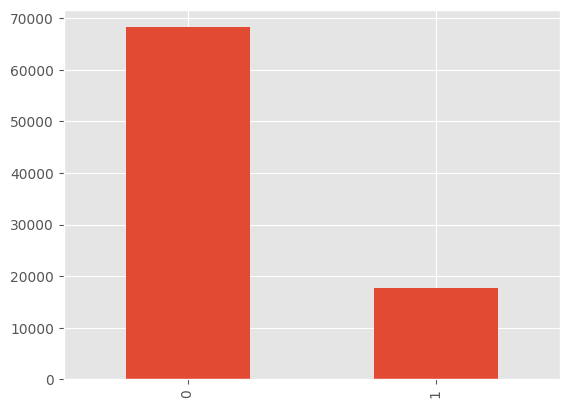

In [6]:
datos.ausente.value_counts().plot(kind='bar')

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 86000 non-null  int64 
 1   id_paciente        86000 non-null  int64 
 2   id_turno           86000 non-null  int64 
 3   sexo               86000 non-null  object
 4   dia_reserva_turno  86000 non-null  object
 5   dia_turno          86000 non-null  object
 6   cod_barrio         86000 non-null  int64 
 7   edad               86000 non-null  int64 
 8   plan_social        86000 non-null  int64 
 9   hipertension       86000 non-null  int64 
 10  diabetes           86000 non-null  int64 
 11  alcoholismo        86000 non-null  int64 
 12  discapacidades     86000 non-null  int64 
 13  sms_recibidos      86000 non-null  int64 
 14  ausente            86000 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 9.8+ MB


In [8]:
datos.describe()

,id,id_paciente,id_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
count,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000
mean,43000.500000,31123.719977,46625.973116,42.601547,36.982860,0.098372,0.196651,0.071151,0.029837,0.022291,0.289302,0.206628
std,24826.205912,17964.921826,27585.167343,22.416531,23.100174,0.297819,0.397469,0.257079,0.170139,0.160967,0.453441,0.404889
min,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21500.750000,15614.000000,23087.750000,26.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43000.500000,31018.500000,45761.500000,40.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64500.250000,46589.000000,69626.250000,61.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,86000.000000,62299.000000,110522.000000,81.000000,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


## Correlacion

### Matriz de Correlacion

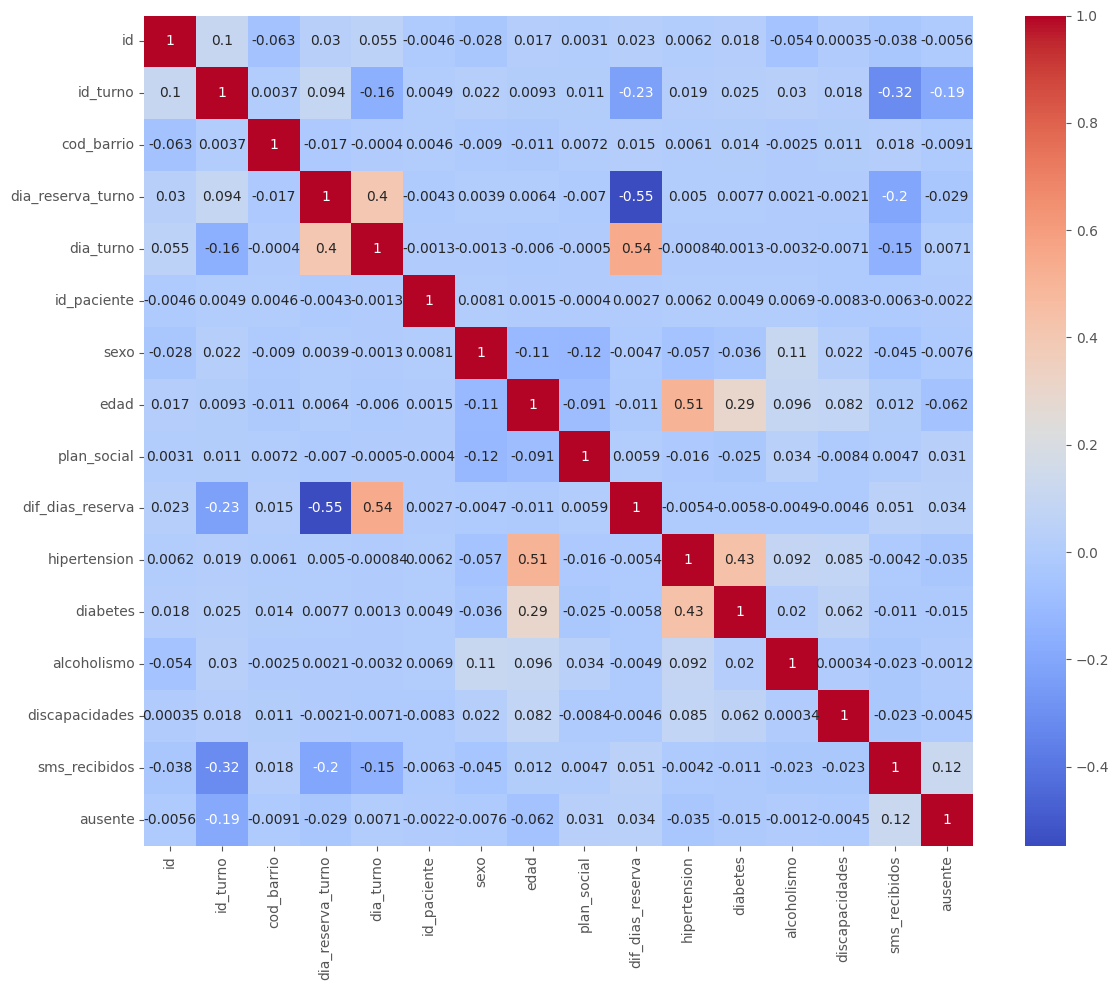

In [433]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = datos.corr()

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Ajusta la disposición de los elementos en la figura
plt.tight_layout()

# Muestra el mapa de calor
plt.show()



### Correlacion Variable Objetivo

**Magnitud de la correlación:**

 *Valores cercanos a 1 indican una correlación positiva fuerte, lo que significa que las variables tienden a aumentar o disminuir juntas.
Valores cercanos a -1 indican una correlación negativa fuerte, lo que significa que las variables tienden a cambiar en direcciones opuestas.
Valores cercanos a 0 indican una correlación débil o nula, lo que implica que no hay una relación lineal aparente entre las variables.*

**Dirección de la correlación:**

 *Una correlación positiva indica que, a medida que una variable aumenta, la otra también tiende a aumentar. Por ejemplo, si la correlación entre el ingreso y el gasto es positiva, significa que a medida que el ingreso aumenta, también lo hace el gasto.
Una correlación negativa indica que, a medida que una variable aumenta, la otra tiende a disminuir. Por ejemplo, si la correlación entre la edad y la frecuencia cardíaca es negativa, significa que a medida que la edad aumenta, la frecuencia cardíaca tiende a disminuir.*

In [424]:
target_correlation = correlation['ausente']
print(target_correlation)

id                  -0.005609
id_turno            -0.186679
cod_barrio          -0.009102
dia_reserva_turno   -0.029471
dia_turno            0.007085
id_paciente         -0.002152
sexo                -0.007580
edad                -0.061913
plan_social          0.031237
dif_dias_reserva     0.033510
hipertension        -0.035368
diabetes            -0.014674
alcoholismo         -0.001217
discapacidades      -0.004479
sms_recibidos        0.118761
ausente              1.000000
Name: ausente, dtype: float64


## Clasificacion de variables

In [9]:
# # Convertir las variables a categóricas
# datos['sexo'] = datos['sexo'].astype('category')
# datos['plan_social'] = datos['plan_social'].astype('category')
# datos['hipertension'] = datos['hipertension'].astype('category')
# datos['diabetes'] = datos['diabetes'].astype('category')
# datos['alcoholismo'] = datos['alcoholismo'].astype('category')
# datos['discapacidades'] = datos['discapacidades'].astype('category')
# datos['sms_recibidos'] = datos['sms_recibidos'].astype('category')
# datos['ausente'] = datos['ausente'].astype('category')
# datos['id_paciente'] = datos['id_paciente'].astype('category')

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 86000 non-null  int64 
 1   id_paciente        86000 non-null  int64 
 2   id_turno           86000 non-null  int64 
 3   sexo               86000 non-null  object
 4   dia_reserva_turno  86000 non-null  object
 5   dia_turno          86000 non-null  object
 6   cod_barrio         86000 non-null  int64 
 7   edad               86000 non-null  int64 
 8   plan_social        86000 non-null  int64 
 9   hipertension       86000 non-null  int64 
 10  diabetes           86000 non-null  int64 
 11  alcoholismo        86000 non-null  int64 
 12  discapacidades     86000 non-null  int64 
 13  sms_recibidos      86000 non-null  int64 
 14  ausente            86000 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 9.8+ MB


## Manipulacion de tipos

In [10]:
datos['sexo'] = datos['sexo'].replace({'F': 0, 'M': 1})

In [11]:
# Extraer el día y el mes de la columna de fecha
datos['dia_reserva_turno'] = pd.to_datetime(datos['dia_reserva_turno']).dt.day
datos['mes_reserva_turno'] = pd.to_datetime(datos['dia_reserva_turno']).dt.month

datos['dia_turno'] = pd.to_datetime(datos['dia_turno']).dt.day
datos['mes_turno'] = pd.to_datetime(datos['dia_turno']).dt.month

# Calcular la diferencia de días entre reserva y turno
datos['dif_dias_reserva'] = datos['dia_turno'] - datos['dia_reserva_turno']
datos['dif_meses_reserva'] = datos['mes_turno'] - datos['mes_reserva_turno']


Normalizacion de datos numericos

In [12]:
# # Seleccionar solo las características numéricas
# numeric_features = ['edad', 'sms_recibidos', 'dif_dias_reserva'] #,'discapacidades'
# numeric_data = datos[numeric_features]

# # Crear el objeto del escalador
# scaler = MinMaxScaler()

# # Ajustar y transformar los datos
# normalized_data = scaler.fit_transform(numeric_data)

# # Crear un nuevo DataFrame con los datos normalizados
# normalized_df = pd.DataFrame(normalized_data, columns=numeric_features)

# # Reemplazar las columnas numéricas en el DataFrame original con las columnas normalizadas
# datos[numeric_features] = normalized_df

# # # Ver los datos normalizados
# # print(datos)

Normalizacion de la fecha

In [13]:
# columnas_fecha = [ 'dia_turno'] #'dia_reserva_turno',

# # Función para normalizar una columna
# normalize_column = lambda x: (x - x.min()) / (x.max() - x.min())

# # Aplicar la normalización a las columnas de fecha
# datos[columnas_fecha] = datos[columnas_fecha].apply(normalize_column)

# # print(datos)


In [14]:
datos.head(10)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente,mes_reserva_turno,mes_turno,dif_dias_reserva,dif_meses_reserva
0,1,30846,29333,0,12,12,40,62,0,1,0,0,0,0,0,1,1,0,0
1,2,55326,29080,1,12,12,40,56,0,0,0,0,0,0,0,1,1,0,0
2,3,15723,29116,0,12,12,46,62,0,0,0,0,0,0,0,1,1,0,0
3,4,9019,29300,0,12,12,55,8,0,0,0,0,0,0,0,1,1,0,0
4,5,23942,29074,0,12,12,40,56,0,1,1,0,0,0,0,1,1,0,0
5,6,47044,21107,0,10,12,59,76,0,1,0,0,0,0,0,1,1,2,0
6,7,57940,22504,0,10,12,26,23,0,0,0,0,0,0,1,1,1,2,0
7,8,14327,22617,0,10,12,26,39,0,0,0,0,0,0,1,1,1,2,0
8,9,37461,26345,0,12,12,2,21,0,0,0,0,0,0,0,1,1,0,0
9,10,42681,21988,0,10,12,13,19,0,0,0,0,0,0,0,1,1,2,0


## Reordenamiento de columnas

In [15]:
# Especificar el nuevo orden de las columnas
new_columns = ['id', 'id_turno', 'cod_barrio', 'dia_reserva_turno', 'dia_turno', 'id_paciente', 'sexo', 'edad', 'plan_social', 'dif_dias_reserva', 'hipertension', 'diabetes', 'alcoholismo', 'discapacidades', 'sms_recibidos', 'ausente']

# Reordenar las columnas utilizando reindex
datos = datos.reindex(columns=new_columns)

# Mostrar los datos actualizados
datos.head(5)

,id,id_turno,cod_barrio,dia_reserva_turno,dia_turno,id_paciente,sexo,edad,plan_social,dif_dias_reserva,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
0,1,29333,40,12,12,30846,0,62,0,0,1,0,0,0,0,0
1,2,29080,40,12,12,55326,1,56,0,0,0,0,0,0,0,0
2,3,29116,46,12,12,15723,0,62,0,0,0,0,0,0,0,0
3,4,29300,55,12,12,9019,0,8,0,0,0,0,0,0,0,0
4,5,29074,40,12,12,23942,0,56,0,0,1,1,0,0,0,0


## Armado Matriz x e y

In [16]:
X=datos.iloc[:,5:15] #antes --> X=datos.iloc[:,0:11] incluia el id
X.head(5)

,id_paciente,sexo,edad,plan_social,dif_dias_reserva,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
0,30846,0,62,0,0,1,0,0,0,0
1,55326,1,56,0,0,0,0,0,0,0
2,15723,0,62,0,0,0,0,0,0,0
3,9019,0,8,0,0,0,0,0,0,0
4,23942,0,56,0,0,1,1,0,0,0


In [17]:
y=datos.iloc[:,15:16]
y.head(7)

,ausente
0,0
1,0
2,0
3,0
4,0
5,0
6,1


## Balance de clases

### Submuestreo + Sobremuestreo

In [18]:
# Submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=80)
X_under, y_under = under_sampler.fit_resample(datos.drop('ausente', axis=1), datos['ausente'])

# Sobre muestreo de la clase minoritaria utilizando el subconjunto submuestreado
over_sampler = SMOTE(random_state=80)
X_balanced, y_balanced = over_sampler.fit_resample(X_under, y_under)


In [19]:
# X = X_balanced.iloc[:,6:14]
# X_balanced.head(5)

In [20]:
# y = y_balanced

In [106]:
# muestraDat = pd.concat([X_balanced, y_balanced], axis=1)
# muestraDat.ausente.value_counts().plot(kind='bar')
# grafico para ver si las clases estan desalanceadas

### **Submuestreo de la clase mayoritaria**

### **NearMiss**

In [22]:
# Aplica NearMiss para realizar el submuestreo de la clase mayoritaria
nm = NearMiss()
X_subsampled, y_subsampled = nm.fit_resample(X, y)

# Crea un nuevo DataFrame con los datos submuestreados
datos_subsampled = pd.concat([X_subsampled, y_subsampled], axis=1)

In [23]:
X=X_subsampled #NearMiss

In [24]:
y=y_subsampled #NearMiss

### **Undersampler** Para equilibrar clases



In [25]:
# Aplicar submuestreo solo al conjunto de entrenamiento
undersampler = RandomUnderSampler(random_state=80)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# datos_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [26]:
# X=X_resampled #undersampler
# X.head(2)

In [27]:
# y=y_resampled #undersampler
# y.head(2)

## Debalance de clases

<Axes: >

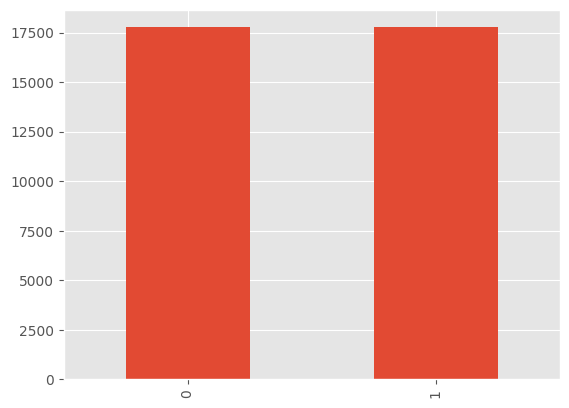

In [108]:
# grafico para ver si las clases estan desbalanceadas

datos_subsampled.ausente.value_counts().plot(kind='bar')

## **Division del conjunto de datos**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=80)

In [29]:
# # NearMiss
# # X_train=X_train_subsampled
# # y_train=y_train_subsampled

# # UnderSampler
# X_train=X_train_resampled
# y_train=y_train_resampled

# Clasificadores

In [31]:

modelo = DecisionTreeClassifier()
modeloLR = LogisticRegression()
modelo_knn = KNeighborsClassifier()
modelo_rf = RandomForestClassifier()
modelo_gnb = GaussianNB()
modelo_xgb = XGBClassifier(max_depth=3, learning_rate=0.1, objective='binary:logistic', eval_metric='logloss')



## GaussianNB

In [32]:
# param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# grid_gnb=GridSearchCV(modelo_gnb,param_grid,cv=7, scoring='f1_macro')
# grid_gnb.fit(X_train,y_train)

# # Obtener el mejor modelo con los mejores hiperparámetros
# modelo_gnb_final = grid_gnb.best_estimator_

# # Hacer predicciones en el conjunto de prueba
# y_pred_gnb = modelo_gnb_final.predict(X_test)

In [401]:
from sklearn.datasets import load_iris

# Entrenar el modelo utilizando los datos de entrenamiento
modelo_gnb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_g = modelo_gnb.predict(X_test)

# Mejora de hiperparámetros utilizando validación cruzada
param_grid = {'var_smoothing': [9e-89, 5e-9, 4e-5, 1e-3, 1e-1]}  # Valores para probar

# Crear una instancia de GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(modelo_gnb, param_grid, cv=9)
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejor valor para var_smoothing:", grid_search.best_params_['var_smoothing'])

# Entrenar el modelo con los mejores hiperparámetros encontrados
modelo_gnb_final = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
modelo_gnb_final.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el modelo mejorado
y_pred_gnb = modelo_gnb_final.predict(X_test)



Mejor valor para var_smoothing: 9e-89


Val cruzada

In [403]:
from sklearn.model_selection import cross_val_score

# Realizar la validación cruzada para cada modelo
modelos = [modelo_gnb_final]
nombres_modelos = ['Gaussian NB']

for modelo, nombre in zip(modelos, nombres_modelos):
    scores = cross_val_score(modelo, X_train, y_train, cv=8, scoring='f1_macro')
    print("F1-score promedio para", nombre, ":", scores.mean())
    print("Desviación estándar de F1-score para \n", nombre, ":", scores.std())
    print()

F1-score promedio para Gaussian NB : 0.6802126309201008
Desviación estándar de F1-score para 
 Gaussian NB : 0.009955170545429713



## KNeighborsClassifier

In [33]:
# Definir los hiperparámetros a ajustar
parametros = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Realizar la búsqueda grid
grid_search = GridSearchCV(modelo_knn, parametros, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
modelo_knn_final = grid_search.best_estimator_
mejores_hiperparametros = grid_search.best_params_

# Realizar predicciones con el mejor modelo
y_pred_knn = modelo_knn_final.predict(X_test)

## Random Forest

In [34]:
# Diccionario de hiperparámetros para la calibración del modelo
rf_param = {
    # 'n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'n_estimators': [10,15,20],
    'criterion': ['gini', 'entropy'],  # Criterio de selección de características
    'max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en cada hoja del árbol
}

In [35]:
# Calibración del modelo con GridSearchCV
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=80)
grid_rf = GridSearchCV(
    modelo_rf,
    param_grid=rf_param,
    cv=kfold,
    verbose=1
)
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=80, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 15, 20]},
             verbose=1)

In [36]:
# Obtener los mejores parámetros y el mejor estimador
best_params_rf = grid_rf.best_params_
best_estimator_rf = grid_rf.best_estimator_

In [37]:
# Entrenar el modelo final con los mejores parámetros
modelo_rf_final = best_estimator_rf.fit(X_train, y_train)

In [38]:
# Validación del modelo final
y_pred_rf = modelo_rf_final.predict(X_test)

In [39]:
# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusión (Random Forest):\n", conf_matrix_rf)

Matriz de confusión (Random Forest):
 [[3613 1682]
 [1358 4009]]


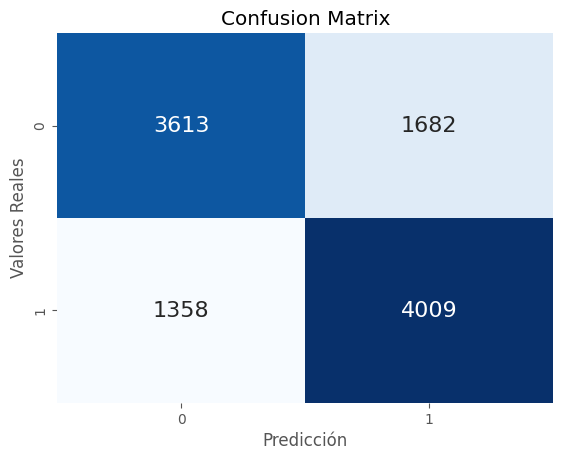

In [40]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_rf, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [41]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)


print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)
print("Kappa score: ", kappa_rf)

Accuracy (Random Forest): 0.7148752579253423
Precision (Random Forest): 0.7044456158847303
Recall (Random Forest): 0.7469722377492082
F1 Score (Random Forest): 0.725085910652921
Kappa score:  0.4294903497958097


In [42]:
grid_rf.best_score_

0.7176218264234471

## DecisionTreeClasifier

In [43]:
tree_param = {
    'criterion': ['entropy','gini'],
    'max_depth': range(1,10),
    'min_samples_leaf': range(1,10)
}

In [44]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=80)
grid = GridSearchCV(
    modelo,
    param_grid= tree_param,
    # cv=10,
    cv=kfold,
    # scoring='f1',
    verbose=1
)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=80, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)},
             verbose=1)

In [45]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5}

In [46]:
grid.best_score_

0.7070909727366874

In [47]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5)

In [48]:
modelo_f=grid.best_estimator_

Prediccion

In [49]:
y_pred_Tree = modelo_f.predict(X_test)

In [50]:
# kappa = cohen_kappa_score(y_test, y_pred_Tree)
# print("Kappa score: ", kappa)

In [51]:
# # Otras métricas de evaluación
# accuracy_rf = accuracy_score(y_test, y_pred_Tree)
# precision_rf = precision_score(y_test, y_pred_Tree)
# recall_rf = recall_score(y_test, y_pred_Tree)
# f1_score_rf = f1_score(y_test, y_pred_Tree)

# print("Accuracy (Random Forest):", accuracy_rf)
# print("Precision (Random Forest):", precision_rf)
# print("Recall (Random Forest):", recall_rf)
# print("F1 Score (Random Forest):", f1_score_rf)

In [52]:
# Matriz de confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_Tree)
print("Matriz de confusión (Random Forest):\n", conf_matrix_tree)

Matriz de confusión (Random Forest):
 [[3870 1425]
 [1613 3754]]


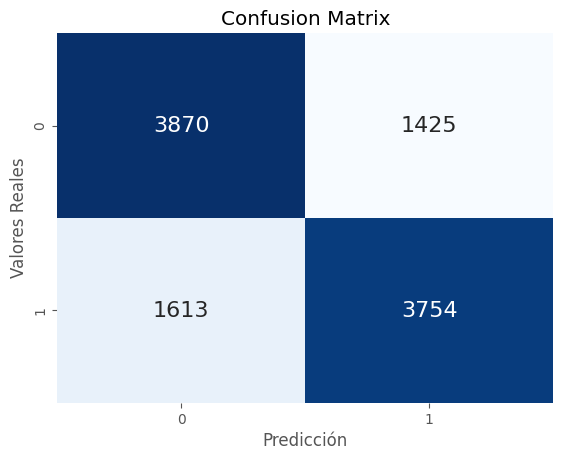

In [53]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_Tree, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

### Seleccion de atributos por importancia

In [54]:

# Obtener la importancia de las características
feature_importances = modelo_f.feature_importances_

# Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(feature_importance_df.head())

# Seleccionar solo las características más importantes
selected_features = feature_importance_df['Feature'].values[:5]  # seleccionar las 5 características más importantes

# Filtrar el conjunto de datos original con las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


            Feature  Importance
4  dif_dias_reserva    0.870102
2              edad    0.075422
0       id_paciente    0.028502
9     sms_recibidos    0.012704
1              sexo    0.006860


## LogisticRegression

In [55]:
# Crear el modelo de Logistic Regression
model_lr = LogisticRegression(solver='liblinear') # 

# Definir los hiperparámetros a ajustar
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Realizar Grid Search para encontrar los mejores hiperparámetros
grid_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, scoring='roc_auc', cv=5)
grid_lr.fit(X_train, y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
final_model_lr = grid_lr.best_estimator_

# Realizar predicciones en los datos de prueba utilizando el mejor modelo
y_pred_lr = final_model_lr.predict(X_test)

# Probabilidades de predicción
y_pred_proba = final_model_lr.predict_proba(X_test)[:, 1]



In [56]:
# Evaluar el rendimiento del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.77      0.66      5295
           1       0.66      0.43      0.52      5367

    accuracy                           0.60     10662
   macro avg       0.61      0.60      0.59     10662
weighted avg       0.61      0.60      0.59     10662



In [57]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
[[4088 1207]
 [3074 2293]]


In [58]:
# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.5774853602075989


In [59]:
# Mejores hiperparámetros encontrados por Grid Search
print("Best Parameters:", grid_lr.best_params_)

print("Best Score:", grid_lr.best_score_)

kappa = cohen_kappa_score(y_test, y_pred_lr)
print("Kappa score: ", kappa)

Best Parameters: {'C': 10, 'penalty': 'l1'}
Best Score: 0.5744129057806163
Kappa score:  0.19881941945363946


In [60]:
# Otras métricas de evaluación
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_rlr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)

print("Accuracy (DecisionTreeClasifier):", accuracy_lr)
print("Precision (DecisionTreeClasifier):", precision_lr)
print("Recall (DecisionTreeClasifier):", recall_rlr)
print("F1 Score (DecisionTreeClasifier):", f1_score_lr)

Accuracy (DecisionTreeClasifier): 0.5984805852560495
Precision (DecisionTreeClasifier): 0.6551428571428571
Recall (DecisionTreeClasifier): 0.427240544065586
F1 Score (DecisionTreeClasifier): 0.5171986015563325


In [61]:
# Matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Matriz de confusión (Random Forest):\n", conf_matrix_lr)

Matriz de confusión (Random Forest):
 [[4088 1207]
 [3074 2293]]


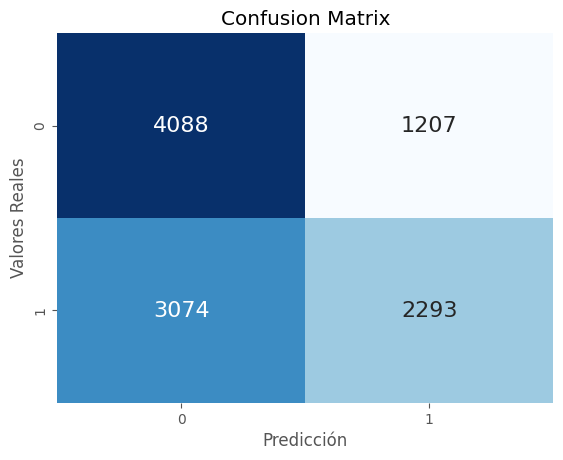

In [62]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_lr, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# **Validacion Cruzada**

identificar el modelo con el mayor puntaje F1 promedio y la menor desviación estándar

In [422]:
from sklearn.model_selection import cross_val_score

# Realizar la validación cruzada para cada modelo
modelos = [modelo_f, final_model_lr, modelo_knn_final, modelo_rf_final, modelo_gnb_final, modelo_xgb]
nombres_modelos = ['Decision Tree', 'Logistic Regression', 'KNN', 'Random Forest', 'Gaussian NB', 'XGBoost']

for modelo, nombre in zip(modelos, nombres_modelos):
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='f1_macro')
    print("F1-score promedio para", nombre, ":", scores.mean())
    print("Desviación estándar de F1-score para \n", nombre, ":", scores.std())
    print()

F1-score promedio para Decision Tree : 0.7033927782477793
Desviación estándar de F1-score para 
 Decision Tree : 0.0061672799506692615

F1-score promedio para Logistic Regression : 0.5871004213302546
Desviación estándar de F1-score para 
 Logistic Regression : 0.012862181459167222

F1-score promedio para KNN : 0.5441568637403809
Desviación estándar de F1-score para 
 KNN : 0.004295616452798745

F1-score promedio para Random Forest : 0.7130815290380397
Desviación estándar de F1-score para 
 Random Forest : 0.0051088861061358345

F1-score promedio para Gaussian NB : 0.6784399321136714
Desviación estándar de F1-score para 
 Gaussian NB : 0.007694509639365785

F1-score promedio para XGBoost : 0.7136041271661616
Desviación estándar de F1-score para 
 XGBoost : 0.002468414239886432



# Clasificador por votacion


In [404]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
   
    estimators = [ 
                    ('lr', final_model_lr),
                   ('rf', modelo_rf_final),
                   ('Tree', modelo_f),
                  #  ('knn', modelo_knn_final), 
                   ('gnb', modelo_gnb_final),
                   ('xgboost', modelo_xgb)],
    # ],
                   voting='hard')


voting_clf.fit(X_train,y_train)
y_pred_vc = voting_clf.predict(X_test)

In [405]:
# Matriz de confusión
conf_matrix_vc = confusion_matrix(y_test, y_pred_vc)
print("Matriz de confusión (VotingClassifier):\n", conf_matrix_vc)

Matriz de confusión (VotingClassifier):
 [[3875 1420]
 [1618 3749]]


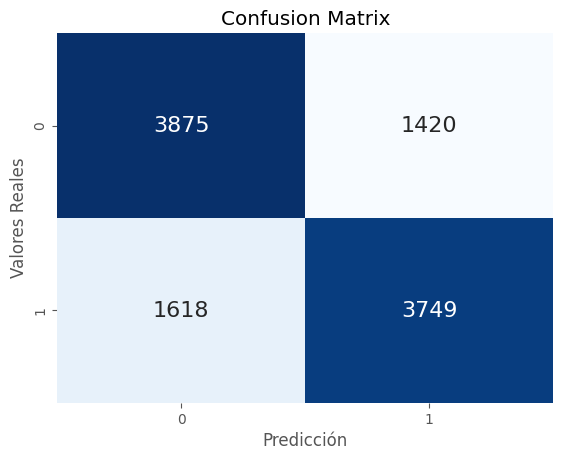

In [406]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_vc, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Leer nuevas instancias a predecir

In [266]:
nuevas_instancias_pd= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/ausentismo_2023/nuevas_instancias_a_predecir.csv',delimiter=',',decimal='.')

In [267]:
nuevas_instancias_pd.shape

(24527, 14)

In [268]:
nuevas_instancias_pd['sexo'] = nuevas_instancias_pd['sexo'].replace({'F': 0, 'M': 1})

In [269]:
nuevas_instancias_pd.head(5)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
0,1,62227,4649,1,2019-07-15 17:14:49+00:00,2019-09-14 00:00:00+00:00,39,15,0,0,0,0,0,1
1,2,43027,12844,1,2019-08-02 07:29:05+00:00,2019-09-21 00:00:00+00:00,39,15,0,0,0,0,0,1
2,3,36016,97746,1,2019-09-14 08:41:06+00:00,2019-09-14 00:00:00+00:00,39,1,0,0,0,0,0,0
3,4,60526,7833,0,2019-07-25 17:47:25+00:00,2019-09-14 00:00:00+00:00,39,11,0,0,0,0,0,1
4,5,2706,97985,0,2019-09-14 09:25:07+00:00,2019-09-14 00:00:00+00:00,39,1,0,0,0,0,0,0


In [270]:
# nuevas_instancias_pd['sexo'] = nuevas_instancias_pd['sexo'].astype('category')
# nuevas_instancias_pd['edad'] = nuevas_instancias_pd['edad'].astype('category')
# nuevas_instancias_pd['plan_social'] = nuevas_instancias_pd['plan_social'].astype('category')
# nuevas_instancias_pd['hipertension'] = nuevas_instancias_pd['hipertension'].astype('category')
# nuevas_instancias_pd['diabetes'] = nuevas_instancias_pd['diabetes'].astype('category')
# nuevas_instancias_pd['alcoholismo'] = nuevas_instancias_pd['alcoholismo'].astype('category')
# nuevas_instancias_pd['discapacidades'] = nuevas_instancias_pd['discapacidades'].astype('category')
# nuevas_instancias_pd['sms_recibidos'] = nuevas_instancias_pd['sms_recibidos'].astype('category')
# nuevas_instancias_pd['id_paciente'] = nuevas_instancias_pd['id_paciente'].astype('category')


# nuevas_instancias_pd['ausente'] = nuevas_instancias_pd['ausente'].astype('category')


In [271]:
# Especificar el nuevo orden de las columnas
new_columns = ['id', 'id_turno', 'cod_barrio', 'dia_reserva_turno', 'dia_turno', 'id_paciente', 'sexo', 'edad', 'plan_social', 'dif_dias_reserva', 'hipertension', 'diabetes', 'alcoholismo', 'discapacidades', 'sms_recibidos', 'ausente']

# # Convertir las columnas de fecha en formato datetime
# nuevas_instancias_pd['dia_reserva_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_reserva_turno'])
# nuevas_instancias_pd['dia_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_turno'])

# # Extraer el mes y el día de las columnas de fecha
# nuevas_instancias_pd['mes_reserva_turno'] = nuevas_instancias_pd['dia_reserva_turno'].dt.month
# nuevas_instancias_pd['dia_reserva_turno'] = nuevas_instancias_pd['dia_reserva_turno'].dt.day

# nuevas_instancias_pd['mes_turno'] = nuevas_instancias_pd['dia_turno'].dt.month
# nuevas_instancias_pd['dia_turno'] = nuevas_instancias_pd['dia_turno'].dt.day

In [272]:
# Extraer el día y el mes de la columna de fecha
nuevas_instancias_pd['dia_reserva_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_reserva_turno']).dt.day
nuevas_instancias_pd['mes_reserva_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_reserva_turno']).dt.month

nuevas_instancias_pd['dia_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_turno']).dt.day
nuevas_instancias_pd['mes_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_turno']).dt.month

# Calcular la diferencia de días entre reserva y turno
nuevas_instancias_pd['dif_dias_reserva'] = nuevas_instancias_pd['dia_turno'] - nuevas_instancias_pd['dia_reserva_turno']
nuevas_instancias_pd['dif_meses_reserva'] = nuevas_instancias_pd['mes_turno'] - nuevas_instancias_pd['mes_reserva_turno']

In [273]:
# Reordenar las columnas utilizando reindex
nuevas_instancias_pd = nuevas_instancias_pd.reindex(columns=new_columns)
nuevas_instancias_pd = nuevas_instancias_pd.iloc[:,5:15]

nuevas_instancias_pd.tail(2)

,id_paciente,sexo,edad,plan_social,dif_dias_reserva,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
24525,45961,0,38,0,10,0,0,0,0,1
24526,52484,0,54,0,10,0,0,0,0,1


Normalizacion de numericos

In [274]:
# # Seleccionar solo las características numéricas
# numeric_features = ['edad', 'sms_recibidos', 'dif_dias_reserva'] #,'discapacidades'
# numeric_data = nuevas_instancias_pd[numeric_features]

# # Crear el objeto del escalador
# scaler = MinMaxScaler()

# # Ajustar y transformar los datos
# normalized_data = scaler.fit_transform(numeric_data)

# # Crear un nuevo DataFrame con los datos normalizados
# normalized_df = pd.DataFrame(normalized_data, columns=numeric_features)

# # Reemplazar las columnas numéricas en el DataFrame original con las columnas normalizadas
# nuevas_instancias_pd[numeric_features] = normalized_df
# nuevas_instancias_pd.head(3)
# # # Ver los datos normalizados
# # print(nuevas_instancias_pd)

Normalizacion de Fecha

In [275]:
# columnas_fecha = [ 'dia_turno'] #'dia_reserva_turno',

# # Función para normalizar una columna
# normalize_column = lambda x: (x - x.min()) / (x.max() - x.min())

# # Aplicar la normalización a las columnas de fecha
# nuevas_instancias_pd[columnas_fecha] = nuevas_instancias_pd[columnas_fecha].apply(normalize_column)

# # print(nuevas_instancias_pd)

Para XGBoost

In [276]:
# Crear el objeto DMatrix para las nuevas instancias
# dnew = xgb.DMatrix(nuevas_instancias_pd)

# Metricas

 XGBoost

In [277]:
# # Otras métricas de evaluación
# accuracy_xg = accuracy_score(y_test, y_pred_xg)
# precision_xg = precision_score(y_test, y_pred_xg)
# recall_xg = recall_score(y_test, y_pred_xg)
# f1_score_xg = f1_score(y_test, y_pred_xg)
# kappa_xg = cohen_kappa_score(y_test, y_pred_xg)


# print("Accuracy (GaussianNB):", accuracy_xg)
# print("Precision (GaussianNB):", precision_xg)
# print("Recall (GaussianNB):", recall_xg)
# print("F1 Score (GaussianNB):", f1_score_xg)
# print("Kappa score: ", kappa_xg)

GNB

In [278]:
# Otras métricas de evaluación
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_score_gnb = f1_score(y_test, y_pred_gnb)
kappa_gnb = cohen_kappa_score(y_test, y_pred_gnb)


print("Accuracy (GaussianNB):", accuracy_gnb)
print("Precision (GaussianNB):", precision_gnb)
print("Recall (GaussianNB):", recall_gnb)
print("F1 Score (GaussianNB):", f1_score_gnb)
print("Kappa score: ", kappa_gnb)

Accuracy (GaussianNB): 0.6778277996623523
Precision (GaussianNB): 0.815068493150685
Recall (GaussianNB): 0.4656232532140861
F1 Score (GaussianNB): 0.5926716471006759
Kappa score:  0.3574990313532098


RF

In [279]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)


print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)
print("Kappa score: ", kappa_rf)

Accuracy (Random Forest): 0.7148752579253423
Precision (Random Forest): 0.7044456158847303
Recall (Random Forest): 0.7469722377492082
F1 Score (Random Forest): 0.725085910652921
Kappa score:  0.4294903497958097


DTC

In [280]:
# Otras métricas de evaluación
accuracy_dtc = accuracy_score(y_test, y_pred_Tree)
precision_dtc = precision_score(y_test, y_pred_Tree)
recall_dtc = recall_score(y_test, y_pred_Tree)
f1_score_dtc = f1_score(y_test, y_pred_Tree)
kappa_dtc = cohen_kappa_score(y_test, y_pred_Tree)


print("Accuracy (DecisionTreeClassifier):", accuracy_rf)
print("Precision (DecisionTreeClassifier):", precision_rf)
print("Recall (DecisionTreeClassifier):", recall_rf)
print("F1 Score (DecisionTreeClassifier):", f1_score_rf)
print("Kappa score: ", kappa_dtc)

Accuracy (DecisionTreeClassifier): 0.7148752579253423
Precision (DecisionTreeClassifier): 0.7044456158847303
Recall (DecisionTreeClassifier): 0.7469722377492082
F1 Score (DecisionTreeClassifier): 0.725085910652921
Kappa score:  0.43023538442330045


LR

In [281]:
# Otras métricas de evaluación
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_rlr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)

print("Accuracy (LogisticRegression):", accuracy_lr)
print("Precision (LogisticRegression):", precision_lr)
print("Recall (LogisticRegression):", recall_rlr)
print("F1 Score (LogisticRegression):", f1_score_lr)
print("Kappa score: ", kappa_lr)

Accuracy (LogisticRegression): 0.5984805852560495
Precision (LogisticRegression): 0.6551428571428571
Recall (LogisticRegression): 0.427240544065586
F1 Score (LogisticRegression): 0.5171986015563325
Kappa score:  0.19881941945363946


Knn

In [282]:
# Otras métricas de evaluación
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)
kappa_knn = cohen_kappa_score(y_test, y_pred_knn)

print("Accuracy (KNeighborsClassifier):", accuracy_knn)
print("Precision (KNeighborsClassifier):", precision_knn)
print("Recall (KNeighborsClassifier):", recall_knn)
print("F1 Score (KNeighborsClassifier):", f1_score_knn)
print("Kappa score: ", kappa_knn)

Accuracy (KNeighborsClassifier): 0.5574001125492403
Precision (KNeighborsClassifier): 0.5847280334728033
Recall (KNeighborsClassifier): 0.4166200857089622
F1 Score (KNeighborsClassifier): 0.4865629420084866
Kappa score:  0.11648682247087883


Votacion

In [283]:
# Otras métricas de evaluación
accuracy_vc = accuracy_score(y_test, y_pred_vc)
precision_vc = precision_score(y_test, y_pred_vc)
recall_vc = recall_score(y_test, y_pred_vc)
f1_score_vc = f1_score(y_test, y_pred_vc)
kappa_vc = cohen_kappa_score(y_test, y_pred_vc)


print("Accuracy (VotingClassifier):", accuracy_vc)
print("Precision (VotingClassifier):", precision_vc)
print("Recall (VotingClassifier):", recall_vc)
print("F1 Score (VotingClassifier):", f1_score_vc)
print("Kappa score: ", kappa_vc)

Accuracy (VotingClassifier): 0.7171262427311949
Precision (VotingClassifier): 0.7376187588437437
Recall (VotingClassifier): 0.679895658654742
F1 Score (VotingClassifier): 0.7075819274772155
Kappa score:  0.4345275457002393


# Importancias

ANOVA

El ANOVA compara la varianza entre los grupos con la varianza dentro de los grupos. Si la varianza entre los grupos es significativamente mayor que la varianza dentro de los grupos, eso sugiere que la característica está relacionada de manera significativa con la variable objetivo. En otras palabras, si el valor de p asociado con el ANOVA es menor que un umbral predefinido (por ejemplo, 0.05), podemos concluir que la característica tiene un efecto significativo en la variable objetivo.

In [284]:
from sklearn.feature_selection import f_classif

# Realizar el cálculo del ANOVA para cada característica
f_scores, p_values = f_classif(X_train, y_train)

# Crear un DataFrame para mostrar los resultados
feature_importances_gnb = pd.DataFrame({'Variable': X_train.columns, 'F-Score': f_scores, 'p-value': p_values})

# Ordenar las variables por su F-Score en orden descendente
feature_importances_gnb = feature_importances_gnb.sort_values(by='F-Score', ascending=True)

# Imprimir el resultado
print(feature_importances_gnb)

           Variable     F-Score        p-value
2              edad    0.257108   6.121181e-01
8    discapacidades    0.384608   5.351532e-01
1              sexo    1.361712   2.432523e-01
7       alcoholismo    1.710039   1.909924e-01
5      hipertension    1.998058   1.575134e-01
6          diabetes    2.032512   1.539785e-01
3       plan_social    2.148844   1.426899e-01
0       id_paciente    6.369608   1.161530e-02
4  dif_dias_reserva   19.309940   1.115858e-05
9     sms_recibidos  881.221513  2.471701e-190


Arbol de decision

In [285]:
# Mostrar las características más importantes
print(feature_importance_df.head())

            Feature  Importance
4  dif_dias_reserva    0.870102
2              edad    0.075422
0       id_paciente    0.028502
9     sms_recibidos    0.012704
1              sexo    0.006860


Logistic Regression

In [286]:
# Obtener los coeficientes de las variables
coefficients_lr = final_model_lr.coef_[0]

# Crear un DataFrame para mostrar los resultados
feature_importances_lr = pd.DataFrame({'Variable': X_train.columns, 'Importance': coefficients_lr})

# Ordenar las variables por importancia absoluta
feature_importances_lr['Importance'] = feature_importances_lr['Importance'].abs()
feature_importances_lr = feature_importances_lr.sort_values('Importance', ascending=True)

# Mostrar los resultados
print(feature_importances_lr)


           Variable  Importance
0       id_paciente    0.000002
2              edad    0.000296
4  dif_dias_reserva    0.009572
8    discapacidades    0.016555
1              sexo    0.020472
5      hipertension    0.042469
3       plan_social    0.056697
6          diabetes    0.072458
7       alcoholismo    0.075178
9     sms_recibidos    0.830795


Random Forest

In [287]:
# Obtener la importancia de las variables
importances_rf = modelo_rf_final.feature_importances_

# Crear un DataFrame para mostrar los resultados
feature_importances_rf = pd.DataFrame({'Variable': X_train.columns, 'Importance': importances_rf})

# Ordenar las variables por importancia
feature_importances_rf = feature_importances_rf.sort_values('Importance', ascending=True)

# Mostrar los resultados
print(feature_importances_rf)

           Variable  Importance
8    discapacidades    0.002917
7       alcoholismo    0.003641
6          diabetes    0.004100
3       plan_social    0.005713
5      hipertension    0.006640
1              sexo    0.011489
9     sms_recibidos    0.039636
2              edad    0.187310
0       id_paciente    0.234435
4  dif_dias_reserva    0.504120


XGBoost

In [288]:
# # Obtener la importancia de las variables
# importances_xgb = modelo_xgb.feature_importances_

# # Crear un DataFrame para mostrar los resultados
# feature_importances_xgb = pd.DataFrame({'Variable': X_train.columns, 'Importance': importances_xgb})

# # Ordenar las variables por importancia
# feature_importances_xgb = feature_importances_xgb.sort_values('Importance', ascending=False)

# # Mostrar los resultados
# print(feature_importances_xgb)


GaussianNB

In [289]:
# Calcular la varianza de cada variable
varianzas = np.var(X_train, axis=0)

# Crear un DataFrame para mostrar los resultados
feature_importances_gnb = pd.DataFrame({'Variable': X_train.columns, 'Variance': varianzas})

# Ordenar las variables por varianza en orden descendente
feature_importances_gnb = feature_importances_gnb.sort_values(by='Variance', ascending=True)

# Mostrar la importancia de las variables
print(feature_importances_gnb)

                          Variable      Variance
discapacidades      discapacidades  2.498859e-02
alcoholismo            alcoholismo  3.006848e-02
diabetes                  diabetes  5.877396e-02
plan_social            plan_social  1.037194e-01
hipertension          hipertension  1.384239e-01
sms_recibidos        sms_recibidos  2.132991e-01
sexo                          sexo  2.251847e-01
dif_dias_reserva  dif_dias_reserva  7.523706e+01
edad                          edad  4.244940e+02
id_paciente            id_paciente  3.228207e+08


# Seleccion de modelo

In [407]:
# modelo = final_model_lr #logisticRegression
# modelo = modelo_f #DessisionTreeClassifier
# modelo = modelo_rf_final #RandomForest
# modelo = xgboost_final
# modelo= modelo_gnb_final
#Estimador por votacion
modelo = voting_clf



# Clasificacion


In [408]:
prediccion_nuevos_individuos = modelo.predict(nuevas_instancias_pd) #dnew para xgboost

In [409]:
datos_clasificados = pd.DataFrame(prediccion_nuevos_individuos)

In [410]:
datos_clasificados.index = datos_clasificados.index + 1

In [411]:
datos_clasificados.tail(3)

,0
24525,1
24526,1
24527,1


In [412]:
datos_clasificados.columns = ['Predicted']
datos_clasificados.index.names = ['id']

In [413]:
datos_clasificados.columns

Index(['Predicted'], dtype='object')

XGboost

In [414]:
# # Convertir las predicciones en valores binarios (0 o 1)
# datos_clasificados["Predicted"] = datos_clasificados["Predicted"].apply(lambda p: 0 if p < 0.60 else 1)

# # Agregar la columna de predicción binaria al DataFrame
# datos_clasificados['Predicted'] = datos_clasificados

In [415]:
datos_clasificados.head(2)

,Predicted
id,
1,1
2,1


**Matriz de Confusion**

In [416]:
# # Matriz de confusión modelo elegido
# conf_matrix_final = confusion_matrix(y_test, prediccion_nuevos_individuos)
# print("Matriz de confusión (Modelo:):\n", conf_matrix_final)

In [417]:
# labels = [0, 1]
# cm=confusion_matrix(y_test, prediccion_nuevos_individuos, labels=labels)
# ax= plt.subplot()
# sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
# ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [418]:
y_pred = prediccion_nuevos_individuos

In [419]:
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Matriz de confusión:\n", conf_matrix)

In [420]:
from google.colab import files

In [421]:
datos_clasificados.to_csv('predicted.csv',sep=',')
files.download('predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>